## API do Pandas no Spark

Importamos a API do pandas no Spark da seguinte forma:

In [6]:
from pyspark import SparkConf
from pyspark.sql import SparkSession

conf = SparkConf()
conf.set('spark.jars.packages', 'org.apache.hadoop:hadoop-aws:3.2.0')
conf.set('spark.hadoop.fs.s3a.aws.credentials.provider', 'com.amazonaws.auth.InstanceProfileCredentialsProvider')
spark = SparkSession.builder.config(conf=conf).getOrCreate()






:: loading settings :: url = jar:file:/usr/local/lib/python3.7/site-packages/pyspark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
org.apache.hadoop#hadoop-aws added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-b8663edc-bc08-4d89-8c02-44f24d5bae89;1.0
	confs: [default]
	found org.apache.hadoop#hadoop-aws;3.2.0 in central
	found com.amazonaws#aws-java-sdk-bundle;1.11.375 in central
:: resolution report :: resolve 328ms :: artifacts dl 14ms
	:: modules in use:
	com.amazonaws#aws-java-sdk-bundle;1.11.375 from central in [default]
	org.apache.hadoop#hadoop-aws;3.2.0 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   2   |   0   |   0   |   0   ||   2   |   0   |
	---------------------------------------------

In [85]:
import pandas as pd
import numpy as np


In [ ]:
pip install matplotlib

In [ ]:
pip install pandas


In [ ]:
## Criação de Objetos

Criando uma série pandas-on-Spark passando uma lista de valores, permitindo que a API pandas no Spark crie um índice inteiro padrão:

In [37]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [38]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [39]:
psdf = pd.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

In [40]:
psdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


## Criando um DataFrame pandas passando uma matriz numpy, com um índice de data e hora e colunas rotuladas:

In [41]:
dates = pd.date_range('20130101', periods=6)

In [42]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [43]:
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [44]:
pdf

,A,B,C,D
2013-01-01,0.658503,-0.968632,0.014203,-1.673691
2013-01-02,-0.609257,1.160038,-0.101994,1.350246
2013-01-03,-0.334795,-0.802363,-0.310513,-1.361701
2013-01-04,0.349204,-2.378346,1.258496,0.326709
2013-01-05,-0.233676,0.549020,0.090729,0.246040
2013-01-06,-0.664372,0.864914,0.525234,-0.474132


### Agora, é possível criar um DataFrame pandas-on-Spark a partir do Spark DataFrame facilmente. 

In [51]:
spark = SparkSession.builder.getOrCreate()

In [52]:
sdf = spark.createDataFrame(pdf)

In [53]:
sdf.show()

+--------------------+-------------------+--------------------+-------------------+
|                   A|                  B|                   C|                  D|
+--------------------+-------------------+--------------------+-------------------+
|  0.6585029000743169|-0.9686321580270084|0.014202537802555367|-1.6736907516029103|
| -0.6092571170554739| 1.1600377450494737|-0.10199439397285666| 1.3502458026699309|
| -0.3347951651737866|-0.8023632777137993| -0.3105129905783497| -1.361701493622331|
|  0.3492036088667156|-2.3783463142629886|  1.2584960898239355|0.32670949136816313|
|-0.23367567466404607|  0.549020366897944| 0.09072854681928227|0.24604015278591856|
| -0.6643718440428472| 0.8649136844794951|  0.5252341147218941|-0.4741320616714488|
+--------------------+-------------------+--------------------+-------------------+



## Criando pandas-on-Spark DataFrame do Spark DataFrame.

In [56]:
sdf.dtypes

[('A', 'double'), ('B', 'double'), ('C', 'double'), ('D', 'double')]

In [57]:
sdf.head()

Row(A=0.6585029000743169, B=-0.9686321580270084, C=0.014202537802555367, D=-1.6736907516029103)

In [59]:
sdf.columns

['A', 'B', 'C', 'D']

# Representação Gráfica

In [69]:
pser = pd.Series(np.random.randn(1000),
                 index=pd.date_range('1/1/2000', periods=1000))

In [70]:
psser = ps.Series(pser)

In [71]:
psser = psser.cummax()

<AxesSubplot:>

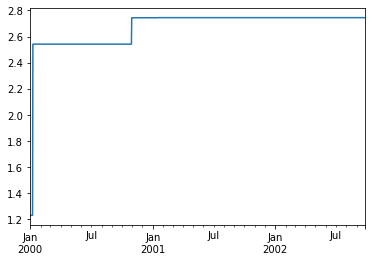

In [79]:
psser.plot()

## Plotando de outra forma

In [ ]:
pdf = pd.DataFrame(np.random.randn(1000, 4), index=pser.index,
                   columns=['A', 'B', 'C', 'D'])

In [ ]:
psdf = ps.from_pandas(pdf)

In [ ]:
psdf = psdf.cummax()

In [ ]:
psdf.plot()